In [1]:
import math

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
METRICS_CSV = "_data/metrics_test_part.csv"

METRICS = [
    "CD",
    "LCOM1",
    "LCOM2",
    "LCOM3",
    "LCOM4",
    "Co",
    "TCC",
    "LCC",
    "LCOM5",
    "C3 (LSI)",
    "COCC (D2V)",
    "LCSM (LSI)",
    "LCOSM (D2V)",
]

METRIC_RENAMES = {
    "db_path": "proj",
    "filename": "name",
    "loc": "LOC",
    "lloc": "LLOC",
    "commits": "Commits",
    "CDI": "CD",
    "NC3(LSI-768-C)": "C3 (LSI)",
    "NC3(D2V-768-C)": "COCC (D2V)",
    "LCSM(LSI-768-C)": "LCSM (LSI)",
    "LCOSM(D2V-768-C)": "LCOSM (D2V)",
}

In [3]:
source_df = pd.read_csv(METRICS_CSV)
source_df = source_df.rename(columns=METRIC_RENAMES)

In [4]:
# Flip "NC3" (Negative C3) to just "C3"
source_df["C3 (LSI)"] = -1 * source_df["C3 (LSI)"]
source_df["COCC (D2V)"] = -1 * source_df["COCC (D2V)"]

In [5]:
n_projects = len(set(source_df["proj"].unique()))
n_files = len(source_df)
print(f"# of Projects: {n_projects}")
print(f"# of Files: {n_files}")

# of Projects: 441
# of Files: 149899


In [6]:
df = source_df[["proj", "name"] + METRICS]
df

,proj,name,CD,LCOM1,LCOM2,LCOM3,LCOM4,Co,TCC,LCC,LCOM5,C3 (LSI),COCC (D2V),LCSM (LSI),LCOSM (D2V)
0,_data/dbs/0999312/TofuCraftReload.db,src/main/java/cn/mcmod/tofucraft/ClientProxy.java,1.251650,10,0,5,4,-0.250000,0.000000,0.000000,NaN,0.229460,0.543764,4.0,0.000000
1,_data/dbs/0999312/TofuCraftReload.db,src/main/java/cn/mcmod/tofucraft/CommonProxy.java,1.664494,15,0,6,6,-0.250000,0.000000,0.000000,1.000000,0.146157,0.207291,3.0,0.066667
2,_data/dbs/0999312/TofuCraftReload.db,src/main/java/cn/mcmod/tofucraft/CreativeTabsT...,0.869618,1,0,2,2,NaN,NaN,NaN,NaN,0.365220,0.619537,0.0,0.000000
3,_data/dbs/0999312/TofuCraftReload.db,src/main/java/cn/mcmod/tofucraft/RecipeLoader....,1.744259,15,0,6,2,-0.050000,0.000000,0.000000,0.600000,0.305793,0.302664,3.0,0.000000
4,_data/dbs/0999312/TofuCraftReload.db,src/main/java/cn/mcmod/tofucraft/TofuConfig.java,1.317126,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149894,_data/dbs/yomguy/servestream.db,src/net/sourceforge/servestream/transport/Tran...,1.627724,10,0,5,4,-0.250000,0.000000,0.000000,1.000000,0.368518,0.389904,0.0,0.000000
149895,_data/dbs/yomguy/servestream.db,src/net/sourceforge/servestream/utils/BackupUt...,1.432495,14,13,5,1,0.100000,1.000000,1.000000,0.800000,0.254856,0.436219,1.0,0.000000
149896,_data/dbs/yomguy/servestream.db,src/net/sourceforge/servestream/utils/Preferen...,1.310860,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149897,_data/dbs/yomguy/servestream.db,src/net/sourceforge/servestream/utils/UriBeanL...,1.403561,25,22,6,3,0.023810,0.333333,0.333333,0.714286,0.273072,0.501383,0.0,0.000000


In [7]:
summary = df.describe().transpose()
summary.to_csv("_data/summary.csv")
summary

,count,mean,std,min,25%,50%,75%,max
CD,149899.0,1.254791,0.266265,0.056697,1.105116,1.287566,1.437967,4.445274e+00
LCOM1,149899.0,211.650078,15481.754011,0.000000,3.000000,10.000000,36.000000,2.837360e+06
LCOM2,149899.0,168.426901,15418.914825,0.000000,0.000000,0.000000,0.000000,2.836567e+06
LCOM3,149899.0,7.102809,14.380702,0.000000,3.000000,5.000000,8.000000,1.590000e+03
LCOM4,149899.0,5.680558,10.502859,0.000000,2.000000,4.000000,6.000000,8.850000e+02
Co,113911.0,-0.249556,0.331769,-1.000000,-0.333333,-0.142857,-0.035714,5.000000e-01
TCC,103983.0,0.072833,0.195183,0.000000,0.000000,0.000000,0.018182,1.000000e+00
LCC,103983.0,0.076899,0.199060,0.000000,0.000000,0.000000,0.018182,1.000000e+00
LCOM5,111184.0,0.764224,0.356094,0.000000,0.600000,0.833333,0.970833,2.000000e+00
C3 (LSI),138075.0,0.383252,0.187184,-0.000000,0.248596,0.348093,0.487806,1.000000e+00


In [8]:
def plot_histograms_on_same_figure(df, metric_names, hist_per_row=3):
    n_metrics = len(metric_names)
    n_rows = math.ceil(n_metrics / hist_per_row)
    fig, axes = plt.subplots(n_rows, hist_per_row, figsize=(9, n_rows * 1.5))
    axes = axes.flatten()
    for idx, metric in enumerate(metric_names):
        series = df[metric]
        sns.histplot(series, bins=40, ax=axes[idx], kde=False, color='black', edgecolor='black')
        axes[idx].set_title(metric, fontsize=8)
        axes[idx].set_xlabel("")
        axes[idx].set_ylabel("")
        axes[idx].tick_params(left=False)
        axes[idx].set_xticks([])
        axes[idx].set_yticks([])
    for i in range(idx + 1, len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    return fig, axes


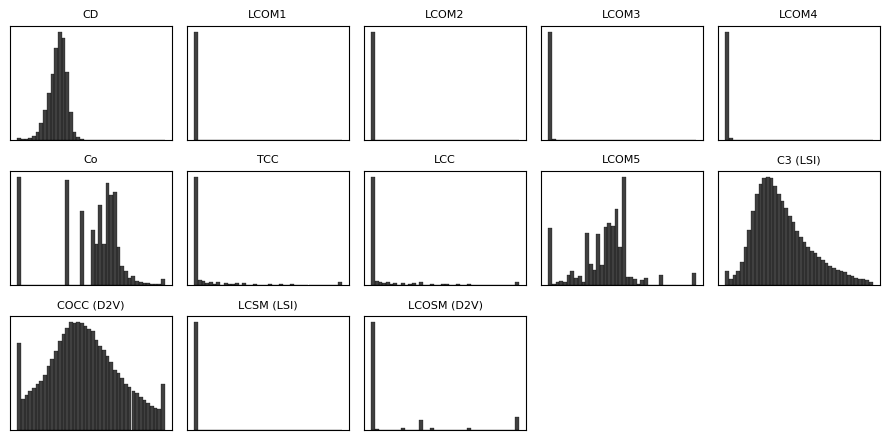

In [9]:
fig, axes = plot_histograms_on_same_figure(df, METRICS, hist_per_row=5)
fig.savefig("_data/histograms.pdf", dpi=300, bbox_inches="tight")